In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# import data 
tomato_data = pd.read_excel('tomato_final_version.xlsx')
tomato_data.head()

,cretic(%),cretic_count,cretic_fresh,cretic_rate,cretic_rot,user(%),user_number,user_rate,name
0,93,403,374,8.2/10,29,87,229322,4.3/5,Star Wars Ep. VII: The Force Awakens
1,82,303,249,7.4/10,54,82,1381863,4.1/5,Avatar
2,97,444,430,8.2/10,14,79,84175,4.1/5,Black Panther
3,84,407,344,7.5/10,63,91,51037,4.5/5,Avengers: Infinity War
4,89,184,163,8.0/10,21,69,35797356,3.3/5,Titanic


In [126]:
# import imdb data
imdb_data = pd.read_csv('imdb.csv')
imdb_df = imdb_data[['Title', 'imdbVotes', 'imdbRating']]
imdb_df.loc[0, 'Title'] = 'Star Wars Ep. VII: The Force Awakens'
imdb_df.loc[0, 'imdbVotes'] = 767831
imdb_df.loc[0, 'imdbRating'] = 8.0

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [31]:
#import metacretic data
meta_data = pd.read_csv('meta.csv')
meta_data.head()

,Unnamed: 0,title,release_date,critic_score,user_score,genres
0,0,Star Wars Ep. VII: The Force Awakens,"December 18, 2015",81,6.8,"['Action', 'Adventure', 'Sci-Fi', 'Fantasy']"
1,1,Avatar,"December 18, 2009",83,7.5,"['Action', 'Adventure', 'Sci-Fi', 'Fantasy']"
2,2,Black Panther,"February 16, 2018",88,6.6,"['Action', 'Adventure', 'Sci-Fi', 'Drama']"
3,3,Avengers: Infinity War,"April 27, 2018",68,8.6,"['Action', 'Adventure', 'Sci-Fi', 'Fantasy']"
4,4,Titanic,"December 19, 1997",75,8.5,"['Drama', 'Romance']"


In [223]:
# user VS cretic
user_cretic_rate =  pd.DataFrame(
    data={
        'tomato_critic': [float(item[0:3]) * 10 for item in tomato_data['cretic_rate']],
        'tomato_user': [float(item[0:3]) * 20 for item in tomato_data['user_rate']],
        'meta_critic': meta_data['critic_score'],
        'meta_user': meta_data['user_score'] * 10,
        'movie': meta_data['title'],
        'imdb_user': imdb_df['imdbRating'] * 10,
        'id': list(range(100))
    }
)
user_cretic_rate.head()

,id,imdb_user,meta_critic,meta_user,movie,tomato_critic,tomato_user
0,0,80.0,81,68.0,Star Wars Ep. VII: The Force Awakens,82.0,86.0
1,1,78.0,83,75.0,Avatar,74.0,82.0
2,2,74.0,88,66.0,Black Panther,82.0,82.0
3,3,85.0,68,86.0,Avengers: Infinity War,75.0,90.0
4,4,78.0,75,85.0,Titanic,80.0,66.0


In [397]:
user_cretic_rate.loc[38, 'movie'] = 'Beauty and the Beast(1991)'
user_cretic_rate.loc[71, 'movie'] = "Pirates of the Caribbean: At World's End"
user_cretic_rate.loc[20, 'movie'] = "Pirates of the Caribbean: Dead Man's Chest"

In [398]:
user_cretic_rate['overall_user'] = round((user_cretic_rate['tomato_user'] + user_cretic_rate['meta_user'] + user_cretic_rate['imdb_user']) / 3, 1)
user_cretic_rate['overall_critic'] = (user_cretic_rate['tomato_critic'] + user_cretic_rate['meta_critic']) /2
user_cretic_rate.head()

,id,imdb_user,meta_critic,meta_user,movie,tomato_critic,tomato_user,overall_user,overall_critic
0,0,80.0,81,68.0,Star Wars Ep. VII: The Force Awakens,82.0,86.0,78.0,81.5
1,1,78.0,83,75.0,Avatar,74.0,82.0,78.3,78.5
2,2,74.0,88,66.0,Black Panther,82.0,82.0,74.0,85.0
3,3,85.0,68,86.0,Avengers: Infinity War,75.0,90.0,87.0,71.5
4,4,78.0,75,85.0,Titanic,80.0,66.0,76.3,77.5


In [231]:
def diffrent_rate(movie, critic, user, column, id_):
    different = pd.DataFrame(
        data={
            'movie': movie,
            'id': id_,
            column: critic - user 
        }
    )
    
    return different

In [399]:
# plot tomato different
tomato_dif = diffrent_rate(user_cretic_rate.movie, user_cretic_rate['tomato_critic'], user_cretic_rate['tomato_user'],
             'tomato_dif(%)', user_cretic_rate['id'])

In [400]:
# plot metacretic different
meta_dif = diffrent_rate(user_cretic_rate.movie, user_cretic_rate['meta_critic'], user_cretic_rate['meta_user'],
             'meta_dif(%)', user_cretic_rate['id'])

In [401]:
# plot overall different
overall_dif = diffrent_rate(user_cretic_rate.movie, user_cretic_rate['overall_critic'], user_cretic_rate['overall_user'],
             'overall_dif(%)', user_cretic_rate['id'])

In [402]:
dif_df = tomato_dif.merge(meta_dif, on='id').merge(overall_dif, on='id').drop(columns=['movie_x', 'movie_y'])

In [403]:
#top 10 movies critic like but not users
cri_like_df = dif_df.loc[dif_df['tomato_dif(%)'] > 0].loc[dif_df['meta_dif(%)'] > 0].sort_values('overall_dif(%)').set_index('movie')

In [393]:
cri_like_df

,id,tomato_dif(%),meta_dif(%),overall_dif(%)
movie,,,,
Star Wars Ep. IV: A New Hope,14,5.0,2.0,3.2
Harry Potter and the Goblet of Fire,90,7.0,3.0,3.7
Toy Story 3,23,3.0,3.0,4.5
The Lord of the Rings: The Return of the King,37,13.0,3.0,5.8
Indiana Jones and the Kingdom of the Crystal Skull,66,3.0,11.0,6.3
Inside Out,45,3.0,7.0,6.5
Finding Nemo,35,11.0,3.0,7.2
"The Chronicles of Narnia: The Lion, the Witch and the Wardrobe",87,7.0,17.0,9.0
Beauty and the Beast(1991),38,11.0,8.0,9.7


/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


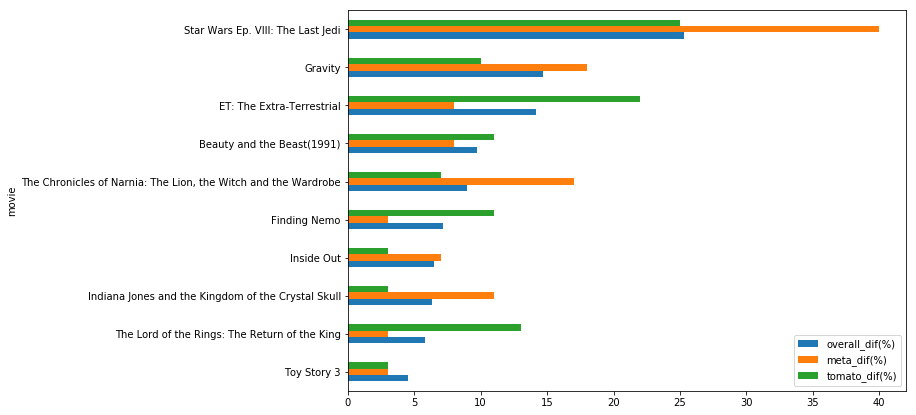

In [404]:
cri_like_plot = cri_like_df[-10:].plot(kind='barh', 
                      y=['overall_dif(%)','meta_dif(%)', 'tomato_dif(%)'], 
                      figsize=(10, 7))
cri_like_plot.get_figure().savefig("graph/critic_like_plot", bbox_inches="tight")

In [405]:
# top 10 movies like by users but not critics
user_like_df = dif_df.loc[dif_df['tomato_dif(%)'] < 0].loc[dif_df['meta_dif(%)'] < 0].sort_values('overall_dif(%)').set_index('movie')
user_like_plot = user_like_df[:10]

In [406]:
user_like_plot['overall_dif(%)'] = user_like_plot['overall_dif(%)'].abs()
user_like_plot['tomato_dif(%)'] = user_like_plot['tomato_dif(%)'].abs()
user_like_plot['meta_dif(%)'] = user_like_plot['meta_dif(%)'].abs()
user_like_plot

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

,id,tomato_dif(%),meta_dif(%),overall_dif(%)
movie,,,,
Transformers: Revenge of the Fallen,30,31.0,18.0,24.0
Batman v Superman: Dawn of Justice,57,21.0,26.0,21.8
Meet the Fockers,96,18.0,29.0,21.2
Suicide Squad,60,22.0,21.0,20.0
The Hobbit: An Unexpected Journey,76,17.0,22.0,18.8
Transformers: Dark of the Moon,47,22.0,15.0,18.3
Pirates of the Caribbean: Dead Man's Chest,20,18.0,19.0,17.8
Star Wars Ep. VI: Return of the Jedi,72,10.0,25.0,17.7
Pirates of the Caribbean: At World's End,71,21.0,13.0,17.5


/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


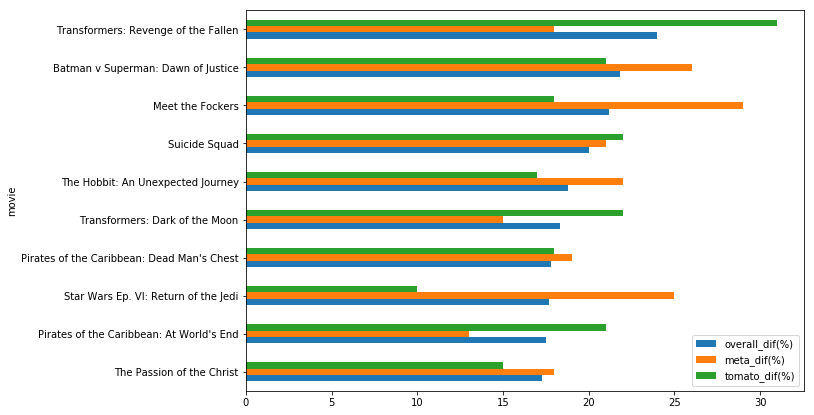

In [407]:
user_like_df[:10].sort_values('overall_dif(%)').plot(kind='barh', 
                      y=['overall_dif(%)','meta_dif(%)', 'tomato_dif(%)'], 
                      figsize=(10, 7)).get_figure().savefig("graph/user_like_plot", bbox_inches="tight")

In [377]:
# get the percentage of different rate
dif_count_data = {
        'Rotten Tomato': [dif_df.loc[dif_df['tomato_dif(%)'] > 5]['movie'].count(), 
                          dif_df.loc[dif_df['tomato_dif(%)'] < -5]['movie'].count()],
        'MetaCritic': [dif_df.loc[dif_df['meta_dif(%)'] > 5]['movie'].count(),
                       dif_df.loc[dif_df['meta_dif(%)'] < -5]['movie'].count()],
        'Overall': [dif_df.loc[dif_df['overall_dif(%)'] > 5]['movie'].count(),
                    dif_df.loc[dif_df['overall_dif(%)'] < -5]['movie'].count()]
    }
dif_count_df = pd.DataFrame(dif_count_data, index=['Critic Prefer', 'User Prefer']).T

In [380]:
dif_count_df['Difference < 5%'] = 100 - dif_count_df['Critic Prefer'] - dif_count_df['User Prefer']

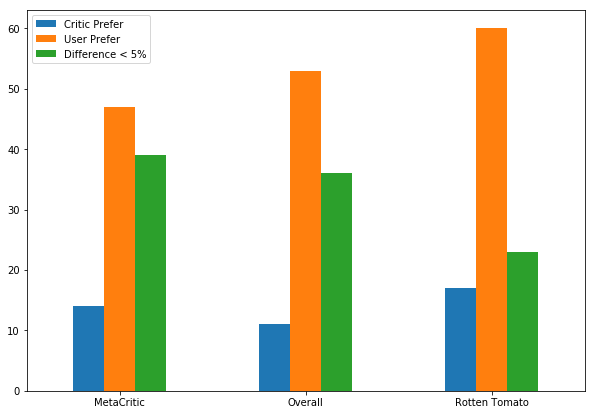

In [385]:
dif_count_df.plot(kind='bar', figsize=(10, 7), rot=0).get_figure().savefig("graph/dif_count", bbox_inches="tight")